In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("uber.csv")

In [5]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [6]:
df = df.drop(['Unnamed: 0', 'key'], axis = 1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44647 entries, 0 to 44646
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        44647 non-null  float64
 1   pickup_datetime    44647 non-null  object 
 2   pickup_longitude   44646 non-null  float64
 3   pickup_latitude    44646 non-null  float64
 4   dropoff_longitude  44646 non-null  float64
 5   dropoff_latitude   44646 non-null  float64
 6   passenger_count    44646 non-null  float64
dtypes: float64(6), object(1)
memory usage: 2.4+ MB


In [8]:
df.shape

(44647, 7)

In [9]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [10]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,44647.000000,44646.000000,44646.000000,44646.000000,44646.000000,44646.000000
mean,11.400106,-72.566735,39.951296,-72.587712,39.955902,1.678627
std,10.081083,10.756469,5.995164,10.667100,5.980302,1.295952
min,0.000000,-748.016667,-74.015515,-737.916665,-74.008745,0.000000
25%,6.000000,-73.992111,40.734764,-73.991485,40.733700,1.000000
50%,8.500000,-73.981854,40.752527,-73.980132,40.752906,1.000000
75%,12.500000,-73.967164,40.767136,-73.963706,40.768169,2.000000
max,350.000000,40.774042,45.031653,40.828377,45.031598,6.000000


In [11]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     1
pickup_latitude      1
dropoff_longitude    1
dropoff_latitude     1
passenger_count      1
dtype: int64

In [12]:
df['fare_amount'].fillna(value=df['fare_amount'].mean(), inplace=True)

In [13]:
df['pickup_longitude'].fillna(value=df['pickup_longitude'].mean(), inplace=True)

In [14]:
df['pickup_latitude'].fillna(value=df['pickup_latitude'].mean(), inplace=True)

In [15]:
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].mean(), inplace=True)

In [16]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(), inplace=True)

In [17]:
df['passenger_count'].fillna(value=df['passenger_count'].mean(), inplace=True)

In [18]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [19]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce')

In [20]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                  float64
dtype: object

In [21]:
df = df.assign(hour = df.pickup_datetime.dt.hour,
               day = df.pickup_datetime.dt.day,
               month = df.pickup_datetime.dt.month,
               year = df.pickup_datetime.dt.year,
               dayofweek = df.pickup_datetime.dt.dayofweek)

In [22]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0,19.0,7.0,5.0,2015.0,3.0
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0,20.0,17.0,7.0,2009.0,4.0
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0,21.0,24.0,8.0,2009.0,0.0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.0,8.0,26.0,6.0,2009.0,4.0
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5.0,17.0,28.0,8.0,2014.0,3.0


In [23]:
df = df.drop('pickup_datetime', axis = 1)

In [24]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19.0,7.0,5.0,2015.0,3.0
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20.0,17.0,7.0,2009.0,4.0
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21.0,24.0,8.0,2009.0,0.0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8.0,26.0,6.0,2009.0,4.0
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,17.0,28.0,8.0,2014.0,3.0


In [25]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
hour                 float64
day                  float64
month                float64
year                 float64
dayofweek            float64
dtype: object

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

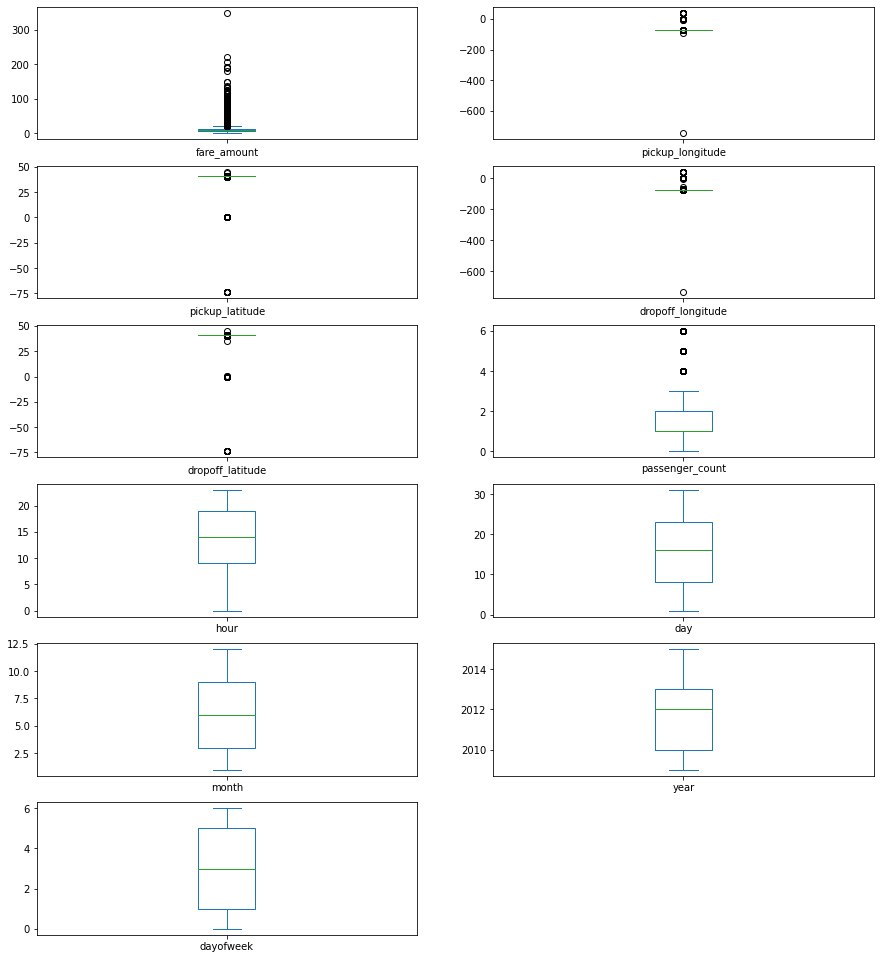

In [26]:
df.plot(kind="box", subplots=True, layout=(7,2), figsize=(15,20))

In [27]:
def remove_outlier(df1, col):
  Q1 = df1[col].quantile(0.25)
  Q3 = df1[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_whisker = Q1 - 1.5*IQR
  upper_whisker = Q3 + 1.5*IQR
  df1[col] = np.clip(df1[col], lower_whisker, upper_whisker)
  return df1

In [28]:
def treat_outliers_all(df1, col_list):
  for c in col_list:
    df1 = remove_outlier(df, c)
  return df1

In [29]:
df = treat_outliers_all(df, df.iloc[: , 0::])

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

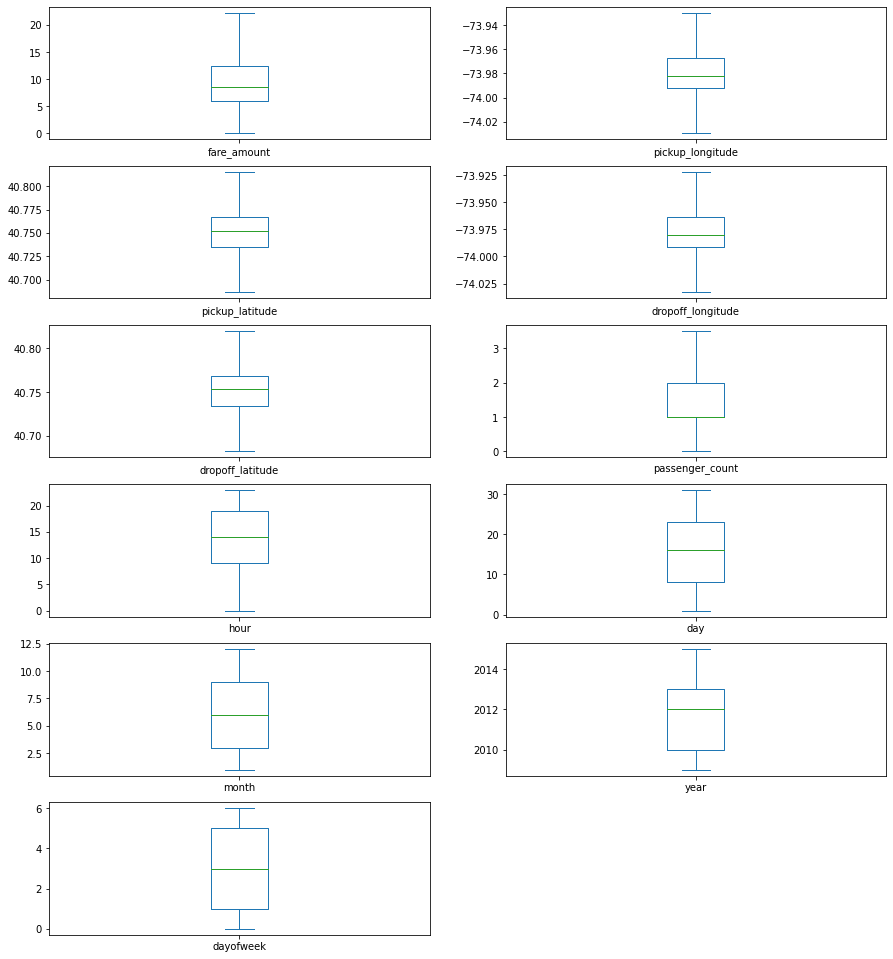

In [30]:
df.plot(kind="box", subplots=True, layout=(7,2), figsize=(15,20))

In [31]:
!pip install haversine


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import haversine as hs
travel_dist = []
for pos in range(len(df['pickup_longitude'])):
  long1, lati1, long2, lati2 = df['pickup_longitude'][pos], df['pickup_latitude'][pos], df['dropoff_longitude'][pos], df['dropoff_latitude'][pos]
  loc1 = (lati1, long1)
  loc2 = (lati2, long2)
  c = hs.haversine(loc1, loc2)
  travel_dist.append(c)


df['dist_travel_km'] = travel_dist
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19.0,7.0,5.0,2015.0,3.0,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20.0,17.0,7.0,2009.0,4.0,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21.0,24.0,8.0,2009.0,0.0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8.0,26.0,6.0,2009.0,4.0,1.661686
4,16.0,-73.929741,40.744085,-73.973082,40.761247,3.5,17.0,28.0,8.0,2014.0,3.0,4.119477


In [33]:
df = df.loc[(df.dist_travel_km >= 1) | (df.dist_travel_km <= 130)]
print("Remaining Observations in the dataset: ", df.shape)

Remaining Observations in the dataset:  (44647, 12)


In [34]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 1
day                  1
month                1
year                 1
dayofweek            1
dist_travel_km       0
dtype: int64

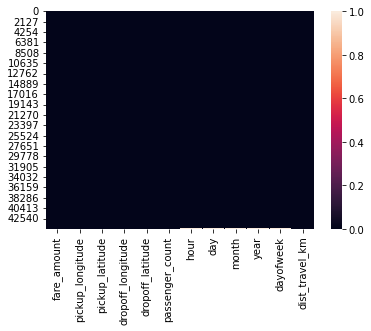

In [35]:
sns.heatmap(df.isnull())

In [36]:
corr = df.corr()

In [37]:
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
fare_amount,1.000000,0.156642,-0.114629,0.221234,-0.131941,0.012501,-0.013672,0.008795,0.031525,0.144200,0.009862,0.783110
pickup_longitude,0.156642,1.000000,0.267200,0.424585,0.082505,-0.007136,0.009957,-0.004904,0.002216,0.011305,-0.030215,0.047750
pickup_latitude,-0.114629,0.267200,1.000000,0.060102,0.519717,-0.009531,0.033275,-0.000710,0.003109,-0.006782,-0.045072,-0.073456
dropoff_longitude,0.221234,0.424585,0.060102,1.000000,0.254413,-0.006964,-0.053371,0.000754,0.003440,0.013456,-0.004765,0.151513
dropoff_latitude,-0.131941,0.082505,0.519717,0.254413,1.000000,-0.004880,0.023513,-0.002108,0.003246,-0.001270,-0.031617,-0.053652
passenger_count,0.012501,-0.007136,-0.009531,-0.006964,-0.004880,1.000000,0.020953,0.009903,0.010632,-0.012732,0.046509,0.012638
hour,-0.013672,0.009957,0.033275,-0.053371,0.023513,0.020953,1.000000,0.004543,-0.006468,0.001743,-0.092943,-0.029847
day,0.008795,-0.004904,-0.000710,0.000754,-0.002108,0.009903,0.004543,1.000000,-0.017096,-0.012449,0.005126,0.003509
month,0.031525,0.002216,0.003109,0.003440,0.003246,0.010632,-0.006468,-0.017096,1.000000,-0.120839,-0.003306,0.012482
year,0.144200,0.011305,-0.006782,0.013456,-0.001270,-0.012732,0.001743,-0.012449,-0.120839,1.000000,0.000771,0.024573


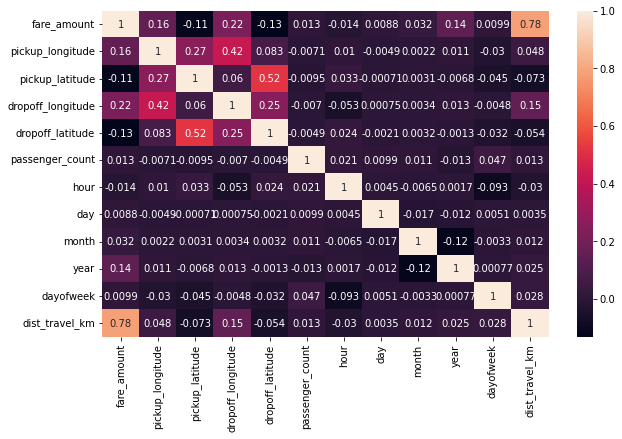

In [38]:
fig, axis = plt.subplots(figsize = (10,6))
sns.heatmap(df.corr(), annot = True)

In [39]:
#Dividing the dataset into training and testing dataset

In [40]:
x = df[['pickup_longitude', 'pickup_longitude', 'dropoff_longitude', 'dropoff_latitude']]
y = df['fare_amount']

In [41]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.33)

In [42]:
#Linear Regression 

In [43]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [44]:
regression.fit(x_train, y_train)

LinearRegression()

In [45]:
regression.intercept_

7319.63780755725

In [46]:
regression.coef_

array([-7.53541765e+14,  7.53541765e+14,  5.87500000e+01, -3.85625000e+01])

In [47]:
prediction = regression.predict(x_test)

In [48]:
print(prediction)

[23.63780756 23.63780756 15.63780756 ...  8.73043562 18.10798193
 17.80001099]


In [49]:
y_test

9877     16.0
21325    10.9
15420     5.7
10646     5.3
19026    11.5
         ... 
4246      9.0
12949     3.3
24157     8.0
42153     7.3
40719    14.9
Name: fare_amount, Length: 14734, dtype: float64

In [50]:
#Metrics Evaluation

In [51]:
from sklearn.metrics import r2_score

In [52]:
r2_score(y_test, prediction)

-3.0725925775996847

In [53]:
from sklearn.metrics import mean_squared_error


In [54]:
MSE = mean_squared_error(y_test, prediction)

In [55]:
MSE

121.6353555354347

In [56]:
RMSE = np.sqrt(MSE)

In [57]:
RMSE

11.02884198524191

In [58]:
#Random Forest Regression

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
rf = RandomForestRegressor(n_estimators=100)

In [61]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [62]:
y_pred = rf.predict(x_test)

In [63]:
y_pred

array([ 7.277 , 15.2765,  7.472 , ...,  7.593 ,  9.087 , 12.894 ])

In [64]:
#Metrics Evalution for Random Forest

In [65]:
R2_Random = r2_score(y_test, y_pred)

In [66]:
R2_Random

0.5600799608770302

In [67]:
MSE_Random = mean_squared_error(y_test, y_pred)

In [68]:
MSE_Random

13.139008959600506

In [69]:
RMSE_Random = np.sqrt(MSE_Random)

In [70]:
RMSE_Random

3.6247770910223576